In [27]:
# Necessary imports
import numpy as np  # Math operations
import pandas as pd  # Data processing, general I/O
import matplotlib.pyplot as plt  # Data graphs, charts, etc.
from sklearn.svm import SVC  # Support Vector Classifier
from sklearn.model_selection import train_test_split  # Training implementation
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV  # Parameter tuning
from sklearn.metrics import classification_report  # Result reporting
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay  # Result graph display
from sklearn.preprocessing import StandardScaler, MinMaxScaler  # Training data scaling
from sklearn.compose import ColumnTransformer  # Excluding data from Scaler transformations
from sklearn.metrics import roc_curve, roc_auc_score  # ROC Curve and AUC Score
from dateutil import parser as date_parser  # Datetime parsing
from datetime import datetime  # Current time
from scipy.stats import uniform  # Data ranges
from numpy import ndarray  # Arrays

# Warning suppression
pd.set_option("future.no_silent_downcasting", True)

# Formatting
np.set_printoptions(edgeitems = 5, linewidth = 180)

# Read the pre-defined data
table = pd.read_csv("breast cancer.csv")
# Show the table
table

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,42,FEMALE,0.952560,2.15000,0.007972,-0.048340,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,20-May-18,26-Aug-18,Alive
1,54,FEMALE,0.000000,1.38020,-0.498030,-0.507320,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,26-Apr-18,25-Jan-19,Dead
2,63,FEMALE,-0.523030,1.76400,-0.370190,0.010815,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Lumpectomy,24-Aug-18,08-Apr-20,Alive
3,78,FEMALE,-0.876180,0.12943,-0.370380,0.132190,I,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,16-Nov-18,28-Jul-20,Alive
4,42,FEMALE,0.226110,1.74910,-0.543970,-0.390210,II,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Lumpectomy,12-Dec-18,05-Jan-19,Alive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,59,FEMALE,0.024598,1.40050,0.024751,0.280320,II,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Lumpectomy,15-Jan-19,27-Mar-20,Alive
330,41,FEMALE,0.100120,-0.46547,0.472370,-0.523870,I,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Modified Radical Mastectomy,25-Jul-18,23-Apr-19,Alive
331,54,FEMALE,0.753820,1.64250,-0.332850,0.857860,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Simple Mastectomy,26-Mar-19,11-Oct-19,Dead
332,74,FEMALE,0.972510,1.42680,-0.366570,-0.107820,II,Infiltrating Lobular Carcinoma,Positive,Positive,Negative,Lumpectomy,26-Nov-18,05-Dec-18,Alive


In [28]:
# Drop columns not needed
table = table.drop([ 'ER status', 'PR status' ], axis = 1)

table

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,42,FEMALE,0.952560,2.15000,0.007972,-0.048340,II,Infiltrating Ductal Carcinoma,Negative,Other,20-May-18,26-Aug-18,Alive
1,54,FEMALE,0.000000,1.38020,-0.498030,-0.507320,II,Infiltrating Ductal Carcinoma,Negative,Other,26-Apr-18,25-Jan-19,Dead
2,63,FEMALE,-0.523030,1.76400,-0.370190,0.010815,II,Infiltrating Ductal Carcinoma,Negative,Lumpectomy,24-Aug-18,08-Apr-20,Alive
3,78,FEMALE,-0.876180,0.12943,-0.370380,0.132190,I,Infiltrating Ductal Carcinoma,Negative,Other,16-Nov-18,28-Jul-20,Alive
4,42,FEMALE,0.226110,1.74910,-0.543970,-0.390210,II,Infiltrating Ductal Carcinoma,Positive,Lumpectomy,12-Dec-18,05-Jan-19,Alive
...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,59,FEMALE,0.024598,1.40050,0.024751,0.280320,II,Infiltrating Ductal Carcinoma,Positive,Lumpectomy,15-Jan-19,27-Mar-20,Alive
330,41,FEMALE,0.100120,-0.46547,0.472370,-0.523870,I,Infiltrating Ductal Carcinoma,Positive,Modified Radical Mastectomy,25-Jul-18,23-Apr-19,Alive
331,54,FEMALE,0.753820,1.64250,-0.332850,0.857860,II,Infiltrating Ductal Carcinoma,Negative,Simple Mastectomy,26-Mar-19,11-Oct-19,Dead
332,74,FEMALE,0.972510,1.42680,-0.366570,-0.107820,II,Infiltrating Lobular Carcinoma,Negative,Lumpectomy,26-Nov-18,05-Dec-18,Alive


In [29]:
# Report how much data is missing
table.isnull().sum()

,0
Age,0
Gender,0
Protein1,0
Protein2,0
Protein3,0
Protein4,0
Tumour_Stage,0
Histology,0
HER2 status,0
Surgery_type,0


In [30]:
# Report the frequency of the positive ("Dead") class in the data set
num_dead = np.where(table['Patient_Status'] == 'Dead', 1, 0).sum()
print(num_dead, '/', len(table))

66 / 334


In [31]:
# Report unique values for the columns to be factorized
factorize_keys = [ 'Gender', 'Tumour_Stage', 'Histology', 'HER2 status', 'Surgery_type', 'Patient_Status' ]
factorized = table[factorize_keys].apply(lambda x: pd.factorize(x)[1].tolist())

for name, series in factorized.items():
  print(name, ":", series)

Gender : ['FEMALE', 'MALE']
Tumour_Stage : ['II', 'I', 'III']
Histology : ['Infiltrating Ductal Carcinoma', 'Infiltrating Lobular Carcinoma', 'Mucinous Carcinoma']
HER2 status : ['Negative', 'Positive']
Surgery_type : ['Other', 'Lumpectomy', 'Modified Radical Mastectomy', 'Simple Mastectomy']
Patient_Status : ['Alive', 'Dead']


In [32]:
# Assume null Patient Status is an Alive patient
table['Patient_Status'] = table['Patient_Status'].replace({ None: "Alive" })
# Assume missing Date of Last Visit is "today"
current_time = datetime.now()
table['Date_of_Last_Visit'] = table['Date_of_Last_Visit'].replace({ None: current_time })

# Replace column data with factorized (uniqueness index) equivalent for better processing
table[factorize_keys] = table[factorize_keys].apply(lambda x: pd.factorize(x)[0])

# Replace dates to float values (seconds since Unix Epoch)
date_keys = [ 'Date_of_Surgery', 'Date_of_Last_Visit' ]
table[date_keys] = table[date_keys].apply(lambda series: series.apply(lambda x: int(date_parser.parse(str(x)).timestamp())))

table

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,42,0,0.952560,2.15000,0.007972,-0.048340,0,0,0,0,1526774400,1535241600,0
1,54,0,0.000000,1.38020,-0.498030,-0.507320,0,0,0,0,1524700800,1548374400,1
2,63,0,-0.523030,1.76400,-0.370190,0.010815,0,0,0,1,1535068800,1586304000,0
3,78,0,-0.876180,0.12943,-0.370380,0.132190,1,0,0,0,1542326400,1595894400,0
4,42,0,0.226110,1.74910,-0.543970,-0.390210,0,0,1,1,1544572800,1546646400,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,59,0,0.024598,1.40050,0.024751,0.280320,0,0,1,1,1547510400,1585267200,0
330,41,0,0.100120,-0.46547,0.472370,-0.523870,1,0,1,2,1532476800,1555977600,0
331,54,0,0.753820,1.64250,-0.332850,0.857860,0,0,0,3,1553558400,1570752000,1
332,74,0,0.972510,1.42680,-0.366570,-0.107820,0,1,0,1,1543190400,1543968000,0


In [33]:
# Set up the data for use by the Support Vector Machine
axisX = table.drop(['Patient_Status'], axis = 1)
axisY = table['Patient_Status']

# Train the model
trainX, testX, trainY, testY = train_test_split(axisX, axisY, train_size = 0.6, random_state = 612)

# Report the shapes of the results
trainX.shape, trainY.shape, testX.shape, testY.shape

((200, 12), (200,), (134, 12), (134,))

In [34]:
# Report the frequency of the positive ("Dead") class in the data sets
num_dead = np.where(trainY == 1, 1, 0).sum()
print("Training set:", num_dead, '/', len(trainY))
num_dead = np.where(testY == 1, 1, 0).sum()
print("Test set:", num_dead, '/', len(testY))

Training set: 44 / 200
Test set: 22 / 134


In [35]:
# Reports need the actual Patient_Status values instead of the scaled values
testY_orig = testY

# Adjust the data
scalerX = MinMaxScaler(feature_range = (-1, 1))
scalerY = MinMaxScaler(feature_range = (-1, 1))

trainX = scalerX.fit_transform(trainX)
testX = scalerX.fit_transform(testX)
trainY = scalerY.fit_transform(np.array(trainY).reshape(-1, 1)).ravel()
testY = scalerY.fit_transform(np.array(testY).reshape(-1, 1)).ravel()

# Report the adjusted training data
print(trainX)

[[ 0.03333333 -1.          0.30590773  0.25527341 -0.55322243 ...  0.         -1.         -0.33333333  0.18823529 -0.49083383]
 [ 0.1        -1.          0.42551368 -0.1019219  -0.21777124 ... -1.         -1.         -1.         -0.92156863 -0.49674749]
 [-0.16666667 -1.          0.61787182  0.83240447  0.15488886 ... -1.         -1.         -1.          0.33333333 -0.2945003 ]
 [-0.1        -1.         -0.17907377 -0.10217826 -0.3945591  ... -1.         -1.         -0.33333333 -0.19607843 -0.7752809 ]
 [-0.56666667 -1.          0.10277171 -0.86190193 -0.10745179 ... -1.          1.          0.33333333  0.36470588 -0.38734477]
 ...
 [ 0.83333333 -1.          0.85301507  0.60862332 -0.41366701 ...  0.         -1.         -1.          0.56862745 -0.39207569]
 [-0.13333333 -1.         -0.02219113  0.55788535 -0.49828942 ...  0.         -1.          0.33333333 -0.2627451  -0.40508575]
 [-0.63333333 -1.          0.56052578  0.44113461  0.21708229 ... -1.         -1.         -0.33333333  0.3

In [36]:
print(testX)

[[ 0.30909091 -1.          0.21565459 -0.19239625  0.04016569 ... -1.         -1.         -0.33333333  0.1184466  -0.38763198]
 [-0.45454545 -1.          0.50719063  0.02321655 -0.43663477 ... -1.         -1.          1.         -0.76504854  0.67715207]
 [-0.49090909 -1.          0.08327002 -1.          0.17403799 ... -1.         -1.         -1.          0.62330097 -0.20723982]
 [ 0.12727273 -1.         -0.05078915  0.31742012 -0.70803028 ...  0.         -1.          1.          0.90291262 -0.24464555]
 [-0.49090909 -1.         -0.00284629 -0.23429783 -0.35089273 ...  0.         -1.          1.         -0.34757282 -0.80452489]
 ...
 [-0.30909091 -1.          0.55070355  0.19044563 -0.44336523 ... -1.         -1.          1.          0.55339806 -0.44555053]
 [-0.23636364 -1.         -0.21396394 -0.44126625 -0.30267276 ... -1.         -1.          0.33333333  0.84466019  0.67715207]
 [ 0.30909091 -1.          0.3713659  -0.68139065 -0.39088702 ... -1.         -1.          1.         -0.0

In [37]:
# Train the model without special parameters
model = SVC(probability = True)
model.fit(trainX, trainY)

# Report the score
print("5-fold cross validation score:", model.score(testX, testY))

5-fold cross validation score: 0.835820895522388


In [38]:
def calculate_predictions(model):
  pred = model.decision_function(testX)
  pred = scalerY.inverse_transform(pred.reshape(-1, 1)).ravel()
  return pred

# Print the prediction results
predictions = calculate_predictions(model)
predictions

array([ 0.04482557,  0.02555723, -0.04794332, -0.05246936, -0.06455579,  0.22016325, -0.04739165,  0.03768423,  0.03587   , -0.05268385,  0.03631916, -0.02162411,  0.03338896,
        0.01795909, -0.01326412,  0.08458942, -0.01931826, -0.04648071, -0.01935283, -0.02086917, -0.03377327,  0.01278877, -0.01614541, -0.01686802,  0.15343632, -0.02276357,
        0.03005325, -0.00812571, -0.05942907,  0.04213947, -0.00885692, -0.00450679, -0.04812498, -0.01620766, -0.06226235, -0.04775961,  0.05731616, -0.02779409,  0.05999205,
       -0.02844099,  0.05250574,  0.02317119,  0.02315603, -0.01728964, -0.01619242,  0.12188506,  0.02567994, -0.01150958, -0.06696539, -0.04539217,  0.06497855,  0.0122842 ,
       -0.01780682, -0.01912459,  0.01173123, -0.05509194,  0.02669455,  0.03843054, -0.01612505, -0.02639966,  0.00681654,  0.00919555, -0.04226547, -0.00423608,  0.01527376,
        0.02809053, -0.00703239,  0.05671956,  0.01458968, -0.05116709, -0.00309637,  0.01502093,  0.05016495,  0.015389

In [39]:
# A simple "predict" call would suffice, but it doesn't really show the connection between the probabilities and the two result classes (class 0: Alive, and class 1: Dead)
CLASS_1_DEAD = 0

def report_predictions(predictions):
  print(classification_report(testY_orig, predictions > CLASS_1_DEAD, target_names = factorized['Patient_Status'], zero_division = np.nan))

report_predictions(predictions)

              precision    recall  f1-score   support

       Alive       0.79      0.51      0.62       112
        Dead       0.11      0.32      0.17        22

    accuracy                           0.48       134
   macro avg       0.45      0.41      0.39       134
weighted avg       0.68      0.48      0.55       134



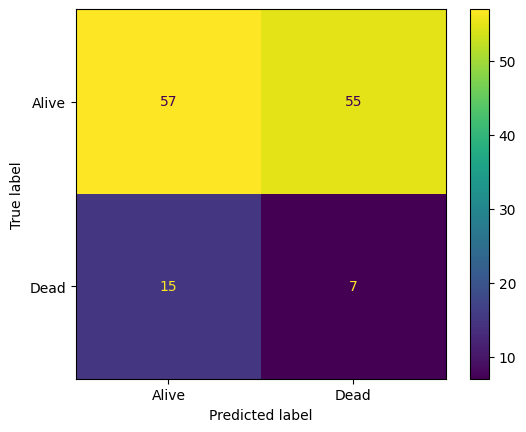

Correct Dead guesses: 7
Incorrect Dead guesses: 55
Correct Alive guesses: 57
Incorrect Alive guesses: 15


In [40]:
def report_confusion_matrix(predictions):
  # Generate the confusion matrix and display it
  cm = confusion_matrix(testY_orig, predictions > CLASS_1_DEAD)

  cm_display = ConfusionMatrixDisplay(cm, display_labels = factorized['Patient_Status'])
  cm_display.plot()
  plt.show()

  # Report the true/false positives and negatives
  tn, fp, fn, tp = cm.ravel()
  print("Correct Dead guesses:", tp)
  print("Incorrect Dead guesses:", fp)
  print("Correct Alive guesses:", tn)
  print("Incorrect Alive guesses:", fn)

report_confusion_matrix(predictions)

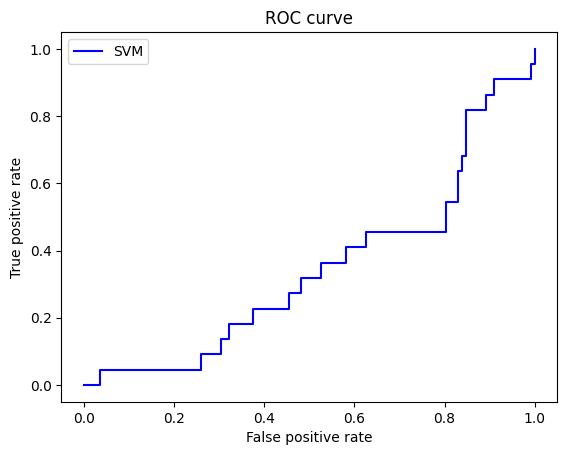

AUC Score: 0.3449675324675324


In [41]:
def show_roc_graph(predictions, title :str, color :str):
  fpr, tpr, thres = roc_curve(testY, predictions)
  score = roc_auc_score(testY, predictions)

  # roc curve
  plt.plot(fpr, tpr, color, label = title)
  plt.xlabel("False positive rate")
  plt.ylabel("True positive rate")
  plt.legend(loc = "best")
  plt.title("ROC curve")
  plt.show()

  return score

# Display the ROC curve
auc_score = show_roc_graph(predictions, "SVM", "b")
print("AUC Score:", auc_score)

In [42]:
# Define the parameter ranges for Grid Search
param_grid = {
    'C': np.arange(1, 11, 1),
    'gamma': np.arange(0.1, 1.1, 0.1),
    'kernel': [ 'rbf' ]
}

search_grid = GridSearchCV(SVC(probability = True), param_grid, n_jobs = -1, refit = True, cv = None, verbose = 1)

# Fit the model into the grid
search_grid.fit(trainX, trainY)

def report_advanced_model(svm):
  print(svm.best_params_)
  print("5-fold cross validation score:", svm.best_score_)

# Report the chosen parameters, updated estimator and CV score
report_advanced_model(search_grid)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
5-fold cross validation score: 0.78


In [43]:
# Run the predictions with the updated model
grid_predictions = calculate_predictions(search_grid)
grid_predictions

array([ 0.01612352, -0.00153293, -0.023325  , -0.02940383, -0.03399892,  0.07569185, -0.02083299,  0.00831335,  0.004167  , -0.0255578 ,  0.01156797, -0.01796462,  0.00791835,
       -0.01838065, -0.00602986,  0.03381243, -0.00978373, -0.03002436, -0.00610865, -0.02432107, -0.02605288,  0.00350457, -0.00431353, -0.01066372,  0.04744918, -0.00765682,
        0.00571837, -0.01279706, -0.0251574 ,  0.00947153, -0.0010705 , -0.01331324, -0.00956309, -0.00836204, -0.03845429, -0.01849427,  0.0275816 , -0.01113181,  0.02272216,
       -0.01250244,  0.01545004,  0.00679832, -0.00119526, -0.01652962, -0.0075344 ,  0.04550237,  0.0063239 , -0.00751313, -0.03370932, -0.02239659,  0.01841531,  0.00802931,
       -0.01208183, -0.01195872,  0.00608041, -0.02163957,  0.01613987,  0.00901788, -0.01279197, -0.016473  , -0.01469032, -0.00221118, -0.01685924, -0.0124155 ,  0.00406443,
        0.010202  , -0.01056279,  0.01878129,  0.00809416, -0.02601755,  0.002519  ,  0.00662121,  0.01926838,  0.000351

In [44]:
# Print the report
report_predictions(grid_predictions)

              precision    recall  f1-score   support

       Alive       0.78      0.55      0.65       112
        Dead       0.09      0.23      0.13        22

    accuracy                           0.50       134
   macro avg       0.44      0.39      0.39       134
weighted avg       0.67      0.50      0.56       134



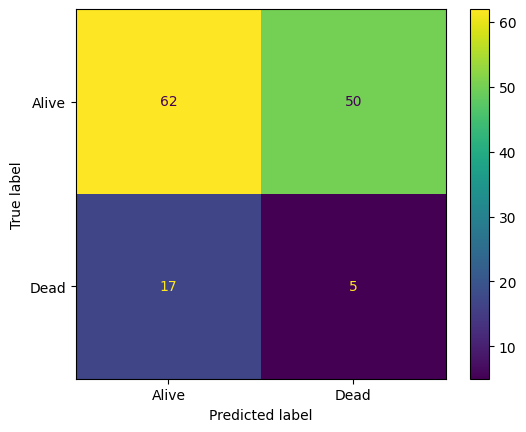

Correct Dead guesses: 5
Incorrect Dead guesses: 50
Correct Alive guesses: 62
Incorrect Alive guesses: 17


In [45]:
# Generate the confusion matrix and display it
report_confusion_matrix(grid_predictions)

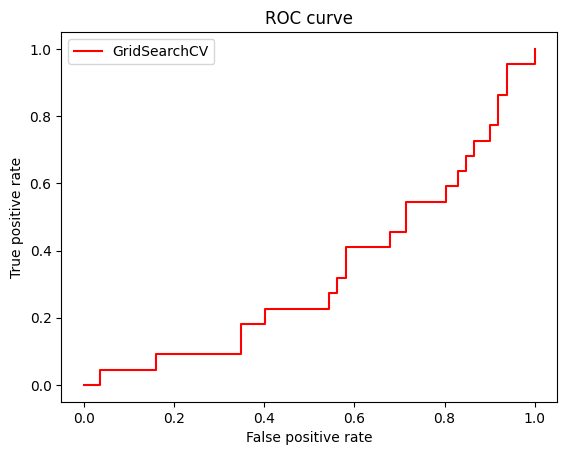

AUC Score: 0.3348214285714286


In [46]:
# Display the ROC curve
grid_auc_score = show_roc_graph(grid_predictions, "GridSearchCV", "r")
print("AUC Score:", grid_auc_score)

In [47]:
# Define the parameter ranges for Randomized Search
param_rand = {
    'C': uniform(1, 10),
    'gamma': uniform(0.00001, 0.5),
    'kernel': [ 'rbf' ]
}

search_rand = RandomizedSearchCV(SVC(probability = True), param_distributions = param_rand, n_iter = 50, n_jobs = -1, refit = True, cv = None, random_state = 413, verbose = 1)

# Fit the model to the random search
search_rand.fit(trainX, trainY)

# Report the chosen parameters, updated estimator and CV score
report_advanced_model(search_rand)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
{'C': 4.584776680919354, 'gamma': 0.025262382203527268, 'kernel': 'rbf'}
5-fold cross validation score: 0.78


In [48]:
# Run the predictiosn with the updated model
random_predictions = calculate_predictions(search_rand)
random_predictions

array([ 5.15629748e-03, -4.85673341e-03, -9.06350602e-03, -1.78579717e-02, -1.58106095e-02,  2.69365211e-02, -7.47993586e-03,  2.65065637e-03, -1.20232839e-05, -1.15950391e-02,
        5.23111041e-03, -1.31135568e-02,  2.69229612e-03, -2.70361822e-02, -6.69049739e-03,  1.19039929e-02, -4.12879857e-03, -1.55129933e-02, -4.57924244e-03, -1.99334057e-02,
       -1.80408510e-02,  3.14752409e-04, -2.23280206e-03, -8.20733759e-04,  1.34333911e-02, -2.19094757e-03, -8.71151326e-03, -6.76183530e-03, -1.04472120e-02,  5.96641062e-03,
       -2.10157763e-03, -8.86571815e-03,  9.17864472e-04, -6.11411193e-03, -2.21254732e-02, -6.76266333e-03,  1.85900612e-02, -3.04635926e-03,  1.00364358e-02, -4.95447515e-03,
        6.94406711e-03,  2.57899796e-03, -2.74311136e-03, -7.04699099e-03, -2.89997387e-03,  1.79821991e-02,  3.34448559e-04, -3.61378674e-03, -1.68011582e-02, -1.09755314e-02,
        6.46345366e-03,  3.63612538e-03, -9.83924377e-03, -3.18648325e-03,  2.69261276e-03, -9.38165160e-03,  1.016

In [49]:
# Print the report
report_predictions(random_predictions)

              precision    recall  f1-score   support

       Alive       0.79      0.62      0.69       112
        Dead       0.09      0.18      0.12        22

    accuracy                           0.54       134
   macro avg       0.44      0.40      0.40       134
weighted avg       0.68      0.54      0.60       134



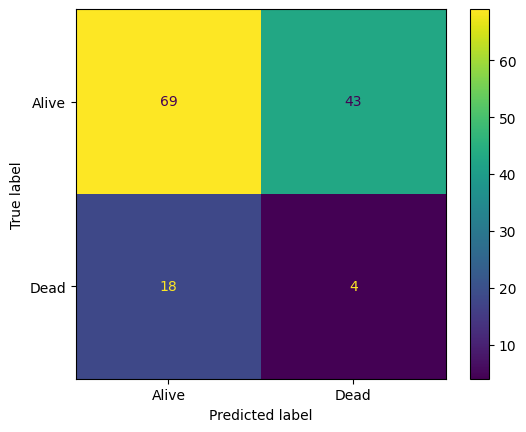

Correct Dead guesses: 4
Incorrect Dead guesses: 43
Correct Alive guesses: 69
Incorrect Alive guesses: 18


In [50]:
# Generate the confusion matrix and display it
report_confusion_matrix(random_predictions)

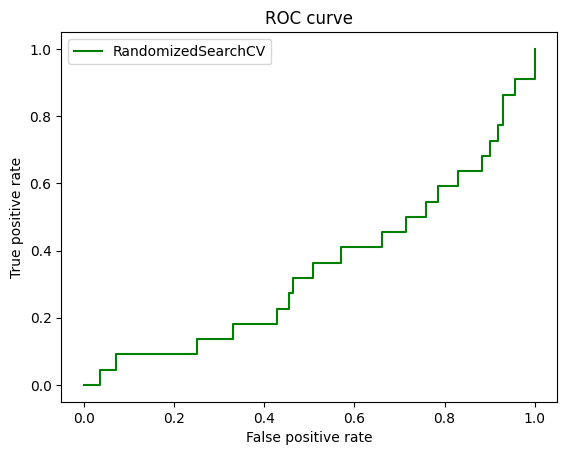

AUC Score: 0.34618506493506496


In [51]:
# Display the ROC curve
random_auc_score = show_roc_graph(random_predictions, "RandomizedSearchCV", "g")
print("AUC Score:", random_auc_score)

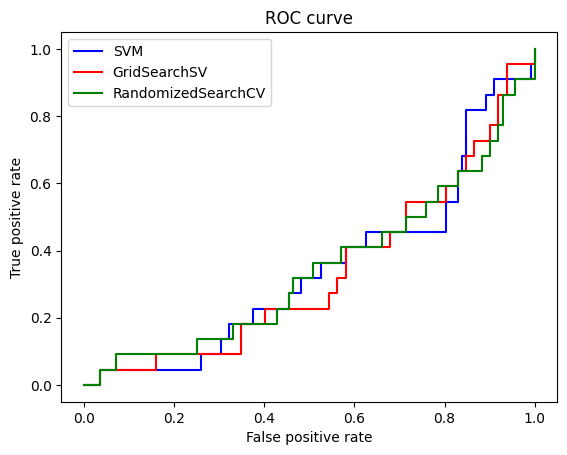

In [52]:
# Show each graph overlapping

# ROC curve for standard SVM
fpr, tpr, thres = roc_curve(testY, predictions)
plt.plot(fpr, tpr, "b", label = "SVM")
# ROC curve for SVM with GridSearchCV
fpr, tpr, thres = roc_curve(testY, grid_predictions)
plt.plot(fpr, tpr, "r", label = "GridSearchSV")
# ROC curve for standard SVM
fpr, tpr, thres = roc_curve(testY, random_predictions)
plt.plot(fpr, tpr, "g", label = "RandomizedSearchCV")

plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.legend(loc = "best")
plt.title("ROC curve")
plt.show()